<a href="https://colab.research.google.com/github/Affanamin/ComputerVision-Projects/blob/main/ComputerVisionProject_With_DataAugmentatation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)

228818944/228813984 [==============================] - 2s 0us/step


In [ ]:
data_dir

'./datasets/flower_photos'

In [ ]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [ ]:
list(data_dir.glob('*/*.jpg'))[:5]

[PosixPath('datasets/flower_photos/tulips/16680927427_07ca6e4552_n.jpg'),
 PosixPath('datasets/flower_photos/tulips/490541142_c37e2b4191_n.jpg'),
 PosixPath('datasets/flower_photos/tulips/16677199221_eab3f22378_n.jpg'),
 PosixPath('datasets/flower_photos/tulips/112951022_4892b1348b_n.jpg'),
 PosixPath('datasets/flower_photos/tulips/3002863623_cd83d6e634.jpg')]

In [ ]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


In [ ]:

roses = list(data_dir.glob('roses/*'))
roses[:5]

[PosixPath('datasets/flower_photos/roses/4504220673_af754fcb40_n.jpg'),
 PosixPath('datasets/flower_photos/roses/4644336779_acd973528c.jpg'),
 PosixPath('datasets/flower_photos/roses/23232710191_cc57620cd5.jpg'),
 PosixPath('datasets/flower_photos/roses/3664842094_5fd60ee26b.jpg'),
 PosixPath('datasets/flower_photos/roses/756943228_e15a7b2318.jpg')]

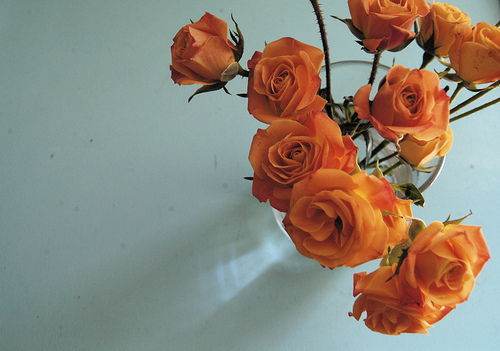

In [ ]:

PIL.Image.open(str(roses[1]))

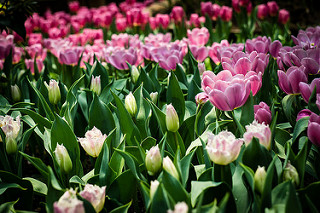

In [ ]:
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[0]))

In [ ]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [ ]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [ ]:
flowers_images_dict['roses'][:5]

[PosixPath('datasets/flower_photos/roses/4504220673_af754fcb40_n.jpg'),
 PosixPath('datasets/flower_photos/roses/4644336779_acd973528c.jpg'),
 PosixPath('datasets/flower_photos/roses/23232710191_cc57620cd5.jpg'),
 PosixPath('datasets/flower_photos/roses/3664842094_5fd60ee26b.jpg'),
 PosixPath('datasets/flower_photos/roses/756943228_e15a7b2318.jpg')]

In [ ]:
str(flowers_images_dict['roses'][0])

'datasets/flower_photos/roses/4504220673_af754fcb40_n.jpg'

In [ ]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))

In [ ]:
img.shape

(213, 320, 3)

In [ ]:
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [ ]:
X, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [ ]:
X = np.array(X)
y = np.array(y)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [ ]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [ ]:
num_classes = 5

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

In [ ]:
## Build simple CNN for image classification

cnn = models.Sequential([
    
    layers.Conv2D(16, 3,padding ='same' ,activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(32, 3 ,padding ='same' ,activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, 3 ,padding ='same' ,activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    #layers.BatchNormalization(),
    #layers.Dropout(0.5),

    
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

In [ ]:
cnn.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
cnn.fit(X_train_scaled, y_train, epochs=5)

Epoch 1/5
86/86 [==============================] - 80s 928ms/step - loss: 1.2586 - accuracy: 0.4604
Epoch 2/5
86/86 [==============================] - 79s 920ms/step - loss: 0.9978 - accuracy: 0.6090
Epoch 3/5
86/86 [==============================] - 79s 923ms/step - loss: 0.7860 - accuracy: 0.7017
Epoch 4/5
86/86 [==============================] - 80s 932ms/step - loss: 0.5898 - accuracy: 0.7827
Epoch 5/5
86/86 [==============================] - 80s 927ms/step - loss: 0.4003 - accuracy: 0.8590


In [ ]:
cnn.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 8s 277ms/step - loss: 1.0581 - accuracy: 0.6394


[1.0580826997756958, 0.6394335627555847]

In [ ]:
### Improve Test Accuracy Using Data Augmentation


data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal"),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

In [ ]:
num_classes = 5

model = Sequential([
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=5)

Epoch 1/5
86/86 [==============================] - 95s 1s/step - loss: 1.6872 - accuracy: 0.3133
Epoch 2/5
86/86 [==============================] - 94s 1s/step - loss: 1.1059 - accuracy: 0.5564
Epoch 3/5
86/86 [==============================] - 93s 1s/step - loss: 0.9585 - accuracy: 0.6154
Epoch 4/5
86/86 [==============================] - 93s 1s/step - loss: 0.8734 - accuracy: 0.6595
Epoch 5/5
86/86 [==============================] - 93s 1s/step - loss: 0.8164 - accuracy: 0.6798


In [ ]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 8s 280ms/step - loss: 0.9312 - accuracy: 0.6623


[0.9311962127685547, 0.6623093485832214]

#### You can see that by using data augmentation and drop out layer the accuracy of test set predictions is increased